In [37]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import string
import re
from sklearn import svm
%matplotlib inline

In [38]:
data = pd.read_csv("data/spam.csv",encoding='latin-1')

In [39]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"Y", "v2":"X"})

In [40]:
data['Y'] = data['Y'].map({'ham': 0, 'spam': 1})
data.head()

,Y,X
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
message = data['X'].copy()
check = data['Y'].copy()
Y=check.as_matrix()
X = message.as_matrix()

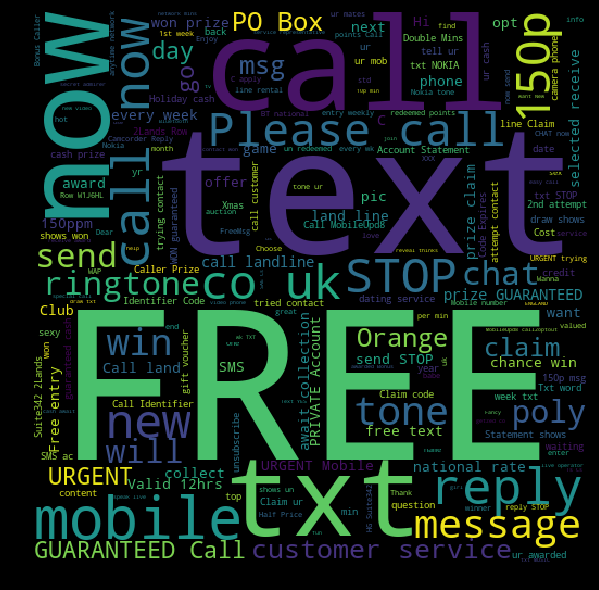

In [42]:
#Visualizing data
spam_words = ' '.join(list(data[data['Y'] == 1]['X']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [43]:
#processing and normalisation of messages
def process_msg(msg):
    msg=msg.lower()
    msg = msg.translate(str.maketrans('', '', string.punctuation))
    msg = word_tokenize(msg)
    stemmer = PorterStemmer()
    m = [stemmer.stem(word) for word in msg]
    return m

In [44]:
#reading vocabulary txt file
def vocav(reverse=False):
    vocab_dict = {}
    with open("data/vocab.txt") as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key 
    return vocab_dict

In [45]:
#getting index of word using our vocabulary dictionary
def indexofword(msg):
    m=process_msg(msg)
    v=vocav()
    index=[v[i] for i in m if i in v]
    return index

In [46]:
#Extracting Features
def featurevector(msg):
    feature=indexofword(msg)
    x = np.zeros((1899))
    for i in feature:
        x[i]=1
    return x

In [47]:
#dividing data into training set and data set
features = np.zeros((5572,1899))
for i in range(0,5572):
    msg=X[i]
    features[i]=featurevector(msg)

train = np.zeros((4500,1899))
test = np.zeros((1072,1899))
for i in range(0,5572):
    if i<4500:
        train[i]=features[i,:]
    else:
        test[i-4500]=features[i,:]
        
trainy = np.zeros((4500,1))
testy = np.zeros((1072,1))  
result = np.zeros((5572,1))
for i in range(0,5572):
    result[i]= Y[i]
for i in range(0,5572):
    if i<4500:
        trainy[i]=result[i,:]
    else:
        testy[i-4500]=result[i,:]

In [48]:
#Training
linear_svm = svm.SVC(C=0.1, kernel='linear')
linear_svm.fit( train, trainy.flatten() )

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
#Testing 
train_predictions = linear_svm.predict(train).reshape((trainy.shape[0],1))
train_acc = 100. * float(sum(train_predictions == trainy))/trainy.shape[0]
print ('Training accuracy = %0.2f%%' % train_acc)

test_predictions = linear_svm.predict(test).reshape((testy.shape[0],1))
test_acc = 100. * float(sum(test_predictions == testy))/testy.shape[0]
print ('Test set accuracy = %0.2f%%' % test_acc)

Training accuracy = 98.24%
Test set accuracy = 97.85%


In [50]:
#testing on a single message 1 for spam else not
c=featurevector('Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18')
b = np.zeros((1,len(c)))
for i in range(0,len(c)):
    b[0,i]=c[i]
linear_svm.predict(b)

array([ 1.])